# Visualizing the 1854 London Cholera Outbreak

Analysis by Venky Rao raove@us.ibm.com

## Background

In 1854, a deadly cholera outbreak occurred in the Soho district of London, England.  By the time the outbreak had ended, 616 people had died in slightly over a month.  The medical community at the time was divided about the causes of cholera.  Some believed that the illness was airborne whereas Dr. John Snow, believed that it was water borne.  To prove his theory, Dr. Snow began collecting data about water sources, the number of deaths, the dates of these deaths, etc.  In this analysis, I aim to step into the good doctor's shoes and walk in his footsteps.  I also hope to prove the value in visualizing data, especially geospatial data which is so readily available today (due to the advent of sensors and drones).

For more information on Dr. John Snow, see https://en.wikipedia.org/wiki/John_Snow.

For more information on the 1854 London Cholera Outbreak, see https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak.  

All data that this analysis uses is sourced from the "HistData" R package, which is available under a GPL license.  For more information on the "HistData" package, see https://cran.r-project.org/web/packages/HistData/HistData.pdf.

## R packages used in this analysis

I installed the following R packages for this analysis:
* HistData
* Lubridate
* KernSmooth
* sp

The following cell installs these packages.  If you already have these packages installed, you can skip this step.

In [12]:
#install.packages("lubridate")
library(lubridate)
#install.packages("HistData")
library(HistData)
#install.packages("KernSmooth")
library(KernSmooth)
#install.packages("sp")
library(sp)

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/s17c-9f3318fc11f06c-d37a4b9405b6/R/libs’
(as ‘lib’ is unspecified)

Attaching package: ‘lubridate’

The following objects are masked from ‘package:SparkR’:

    hour, minute, month, quarter, second, year

The following object is masked from ‘package:base’:

    date

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/s17c-9f3318fc11f06c-d37a4b9405b6/R/libs’
(as ‘lib’ is unspecified)
Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/s17c-9f3318fc11f06c-d37a4b9405b6/R/libs’
(as ‘lib’ is unspecified)
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009
Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/s17c-9f3318fc11f06c-d37a4b9405b6/R/libs’
(as ‘lib’ is unspecified)
Warning message in install.packages("sp"):
“installation of package ‘sp’ had non-zero exit status”
Attaching package: ‘sp’

The following object is masked from ‘package:SparkR’:

    over



## The rise of the outbreak

We begin our analysis by visualizing the stunning rise in the number of deaths from cholera.  While people had begun dying in and around the Broad Street area around the 19th of August, the outbreak really began taking a heavy toll starting on 31 August 1854.  Over the next 3 days, 127 people on or near Broad Street died.  The heavy death toll continued over the next few days although the number of deaths on a daily basis started to reduce from its peak on 2 September 1854 (mostly driven by mass evacuations of people from the Broad Street area).  We can see this in the following chart:

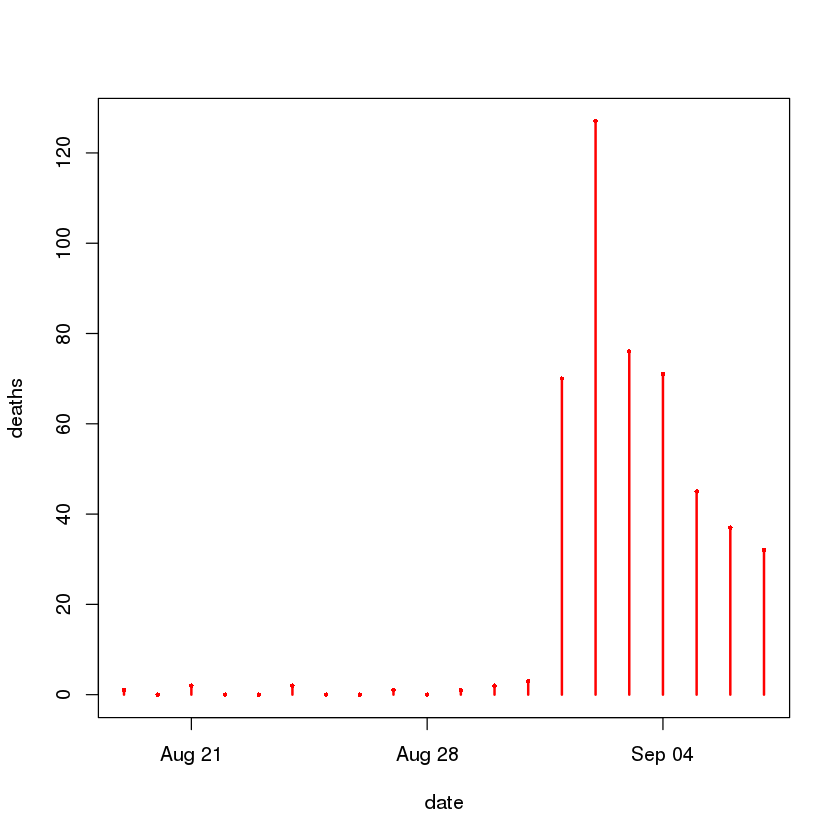

In [62]:
## Plot deaths over time
range <- Snow.dates[1:20,]
plot(deaths ~ date, data=range, type="h", lwd=2, col="red")
points(deaths ~ date, data=range, cex=0.5, pch=16, col="red")

## Plotting the deaths against the sources of drinking water

Next, we plot the various deaths against the location of various sources of drinking water based on John Snow's map and data, as follows:

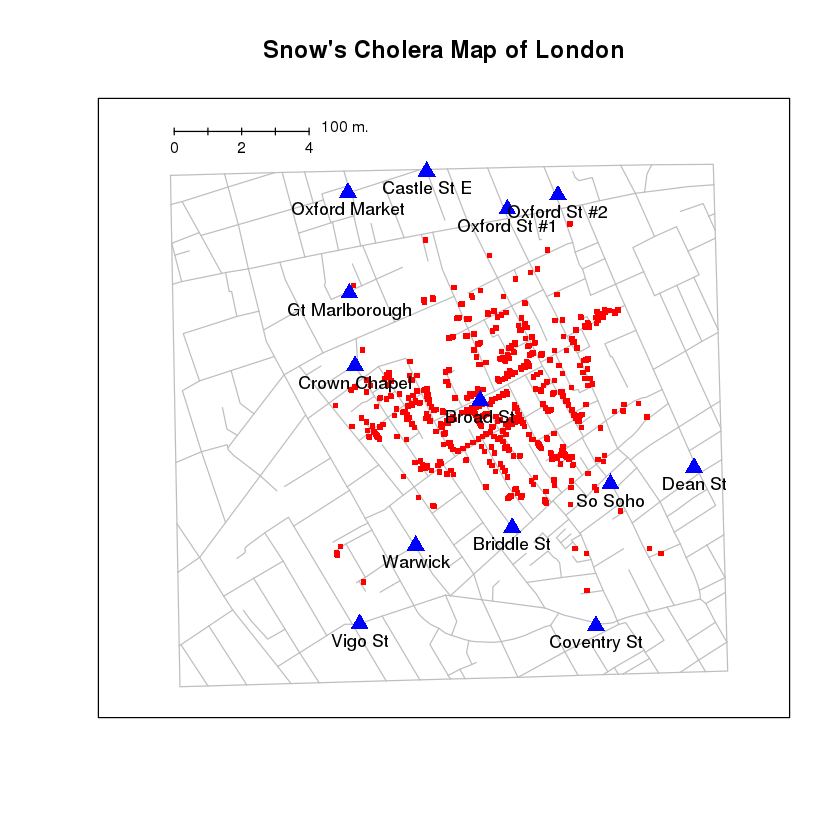

In [65]:
SnowMap()

In the chart above, the blue triangles are the sources of water (wells) and the red dots refer to the location of the deaths.  As can be seen from the chart, a lot of deaths seem to be occuring in and around the Broad Street well.  We can examine this more clearly in the following chart which marks out the population areas that each of these wells serve:

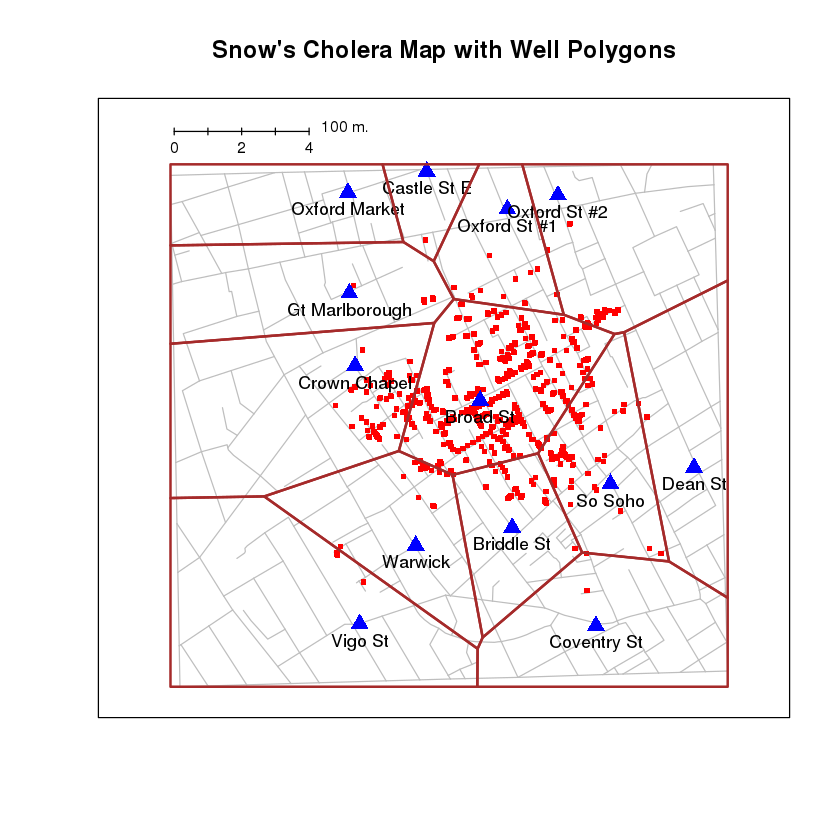

In [66]:
# add polygons
SnowMap(polygons=TRUE, main="Snow's Cholera Map with Well Polygons")

We can zoom into this chart further and create a heat map to highlight the area around the Broad Street well:

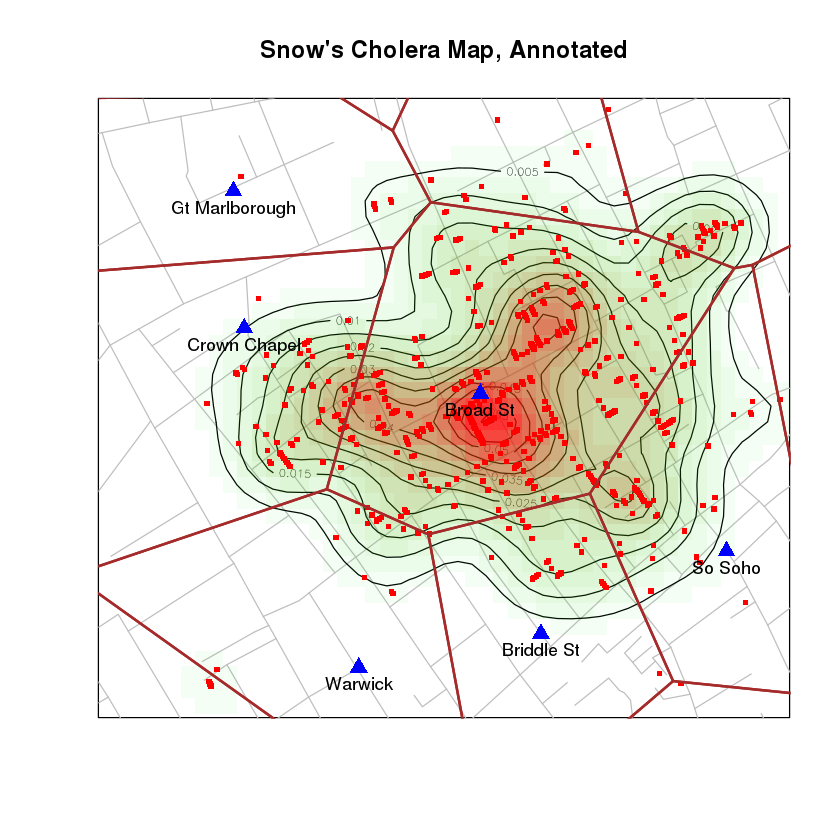

In [67]:
# zoom in a bit, and show density estimate
SnowMap(xlim=c(7.5,16.5), ylim=c(7,16), polygons=TRUE, density=TRUE,
main="Snow's Cholera Map, Annotated")

## Action taken by Dr. Snow

Based on the analysis above, Dr. Snow hypothesized that the water from the Broad Street well was contaminated and was the prime cause for the spread of cholera.  He was able to convince the local authorities to disable the Broad Street well by removing its handle.  The handle of the well was removed on 8 September 1854.

## The results

To examine the results of the action taken by Dr. Snow and the local authorities, we review the plot of deaths over time; this time including data after the handle of the well was removed.

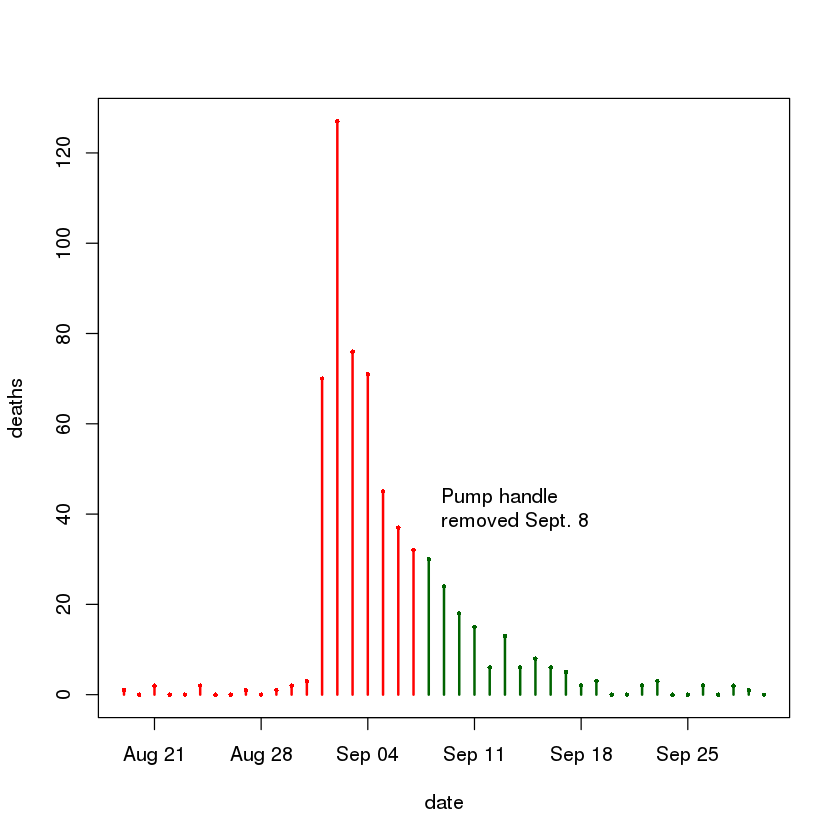

In [68]:
## Plot deaths over time
require(lubridate)
clr <- ifelse(Snow.dates$date < mdy("09/08/1854"), "red", "darkgreen")
plot(deaths ~ date, data=Snow.dates, type="h", lwd=2, col=clr)
points(deaths ~ date, data=Snow.dates, cex=0.5, pch=16, col=clr)
text( mdy("09/08/1854"), 40, "Pump handle\nremoved Sept. 8", pos=4)

As can be seen from the chart above, there was a remarkable reduction in the number of deaths from cholera after 8 September 1854 and the cholera outbreak eventually came to an end.  In part because of his work in tracing the source of the cholera outbreak, Dr. John Snow is considered as one of the fathers of modern epidemiology, which is the study and analysis of patterns, causes and effects of health and disease conditions in defined populations.